What policy approaches are US states taking to address child online safety?

OBJECTIVES:
- Understand the landscape of state child safety bills (146+ bills)
- Identify common policy mechanisms and themes
- Examine geographic and temporal patterns
- Prepare data for classification analysis (Notebook 3)

This notebook performs exploratory data analysis on the Integrity Institute's
Legislative Tracker dataset to characterize state-level policy activity.

In [2]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook

sns.set_style("whitegrid")
sns.set_palette("colorblind")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✓ Libraries loaded")

wb = load_workbook("../data/policy_tracker.xlsx", read_only=True, data_only=True)
print(f"Available sheets: {wb.sheetnames}")


✓ Libraries loaded
Available sheets: ['Data Validation', '1. US Federal - Freedman', 'Freedman - Old', 'Guidance - please review', '8. International', '2. US Federal - Historic', '3. Transparency', '4. US State - Current Child', 'US Federal', '5. 2023 MA Legislative Tracker', 'US State', '12. Public Citizen', 'International', 'Public Conversation', 'Sources', '7. CITRIS', '9. Dotan + Lenhart', '10. US State - AI laws US (epic', '11. US Federal - Digital', 'MA - Legislative Database', 'US State - Historic', 'Data Validation - Updated', 'Translating Policy Types (DPA)', 'Translating Issue Tags (DPA)', 'US Federal (Deprecated)', 'Progress Tracker (WIP)', 'US State (Deprecated)', 'Other', 'Data Validation - Outdated']


In [4]:
# We want the "4. US State - Current Child" sheet
sheet_name = "4. US State - Current Child"
print(f"\nLoading sheet: '{sheet_name}'")

# Now load into Polars
df_child = pl.read_excel(
    "../data/policy_tracker.xlsx", 
    sheet_name=sheet_name
)

print(f"✓ Loaded {len(df_child):,} child safety bills")
print(f"✓ Columns: {len(df_child.columns)}")
print(f"\nColumn names ({len(df_child.columns)} total):")
for i, col in enumerate(df_child.columns, 1):
    print(f"  {i:2}. {col}")

Could not determine dtype for column 14, falling back to string



Loading sheet: '4. US State - Current Child'
✓ Loaded 146 child safety bills
✓ Columns: 17

Column names (17 total):
   1. Tab Name
   2. Ref. Number
   3. US State
   4. Name
   5. Link
   6. Entity Who Introduced
   7. Entity Type (optional)
   8. Intro Date
   9. Governance
  10. Issue Tag
  11. Issue Tag_1
  12. Issue Tag_2
  13. Description
  14. Status (optional)
  15. Additional Notes (optional)
  16. References (optional)
  17. Reference Number (optional)


In [5]:
print("\n=== SAMPLE BILLS ===")
print("\nShowing 3 random bills:")
sample = df_child.sample(3)

for i, row in enumerate(sample.iter_rows(named=True), 1):
    print(f"\n{'='*80}")
    print(f"SAMPLE BILL #{i}")
    print(f"State: {row.get('US State', 'N/A')}")
    print(f"Name: {row.get('Name', 'N/A')}")
    print(f"Status: {row.get('Status (optional)', 'N/A')}")
    print(f"Intro Date: {row.get('Intro Date', 'N/A')}")
    print(f"\nDescription:")
    desc = row.get('Description', 'N/A')
    print(desc[:300] + "..." if len(str(desc)) > 300 else desc)
    print(f"{'='*80}")


=== SAMPLE BILLS ===

Showing 3 random bills:

SAMPLE BILL #1
State: Virginia
Name: Civil liability for publishing or distributing material harmful to minors on the Internet
Status: None
Intro Date: 2023-01-20

Description:
Requires age verification to access websites that are more than one-third pornography, excluding interactive computer services.  Raises age of majority in existing data protection law to 18.

SAMPLE BILL #2
State: Wisconsin
Name: Relating to: prostitution crime surcharge and making an appropriation.
Status: None
Intro Date: 2023-02-28

Description:
Establishes a new fine and appropriates the revenue for investigating and prosecuting Internet crimes against children.

SAMPLE BILL #3
State: Georgia
Name: Student Technology Protection Act
Status: None
Intro Date: 2023-02-13

Description:
Requires instructor and student education on safe use of technology;  tightens acceptable usage and filtering policies at schools.


In [7]:
print("\n\n=== GEOGRAPHIC DISTRIBUTION ===\n")

bills_by_state = (
    df_child
    .group_by("US State")
    .agg(pl.len().alias("num_bills"))
    .sort("num_bills", descending=True)
)

print("Top 15 states by number of bills:")
print(bills_by_state.head(15))

print(f"\nTotal states with bills: {df_child.select('US State').n_unique()}")
print(f"Mean bills per state: {len(df_child) / df_child.select('US State').n_unique():.1f}")



=== GEOGRAPHIC DISTRIBUTION ===

Top 15 states by number of bills:
shape: (15, 2)
┌────────────────┬───────────┐
│ US State       ┆ num_bills │
│ ---            ┆ ---       │
│ str            ┆ u32       │
╞════════════════╪═══════════╡
│ Texas          ┆ 13        │
│ New York       ┆ 13        │
│ New Jersey     ┆ 12        │
│ Massachusetts  ┆ 9         │
│ Connecticut    ┆ 7         │
│ …              ┆ …         │
│ West Virginia  ┆ 4         │
│ Iowa           ┆ 4         │
│ Maryland       ┆ 4         │
│ Wisconsin      ┆ 3         │
│ North Carolina ┆ 3         │
└────────────────┴───────────┘

Total states with bills: 43
Mean bills per state: 3.4


In [9]:
print("\n\n=== LEGISLATIVE STATUS ===\n")

status_counts = (
    df_child
    .group_by("Status (optional)")
    .agg(pl.len().alias("num_bills"))
    .sort("num_bills", descending=True)
)

print("Bills by status:")
print(status_counts)



=== LEGISLATIVE STATUS ===

Bills by status:
shape: (16, 2)
┌─────────────────────────────────┬───────────┐
│ Status (optional)               ┆ num_bills │
│ ---                             ┆ ---       │
│ str                             ┆ u32       │
╞═════════════════════════════════╪═══════════╡
│ null                            ┆ 131       │
│ 4/11/2023 - Passed, now Act 61… ┆ 1         │
│ 1/17/2023 - Referred to Joint … ┆ 1         │
│ 3/14/2023 - Public Hearing, Pe… ┆ 1         │
│ 3/3/2023 - Engrossed - 50% pro… ┆ 1         │
│ …                               ┆ …         │
│ 5/17/2023 - Engrossed - 50% pr… ┆ 1         │
│ 4/3/2023 - In committee, Set, … ┆ 1         │
│ 4/25/2023 - Set for first hear… ┆ 1         │
│ 9/15/2023 - Chaptered by Secre… ┆ 1         │
│ 6/1/2023 - Ordered to inactive… ┆ 1         │
└─────────────────────────────────┴───────────┘


In [11]:
passed_keywords = ['passed', 'enacted', 'act ', 'chaptered', 'signed']
passed_bills = df_child.filter(
    pl.col('Status (optional)')
    .cast(pl.Utf8)
    .str.to_lowercase()
    .str.contains('|'.join(passed_keywords))
)

print(f"\n✓ Identified {len(passed_bills)} potentially PASSED bills")
print("\nPassed bills:")
for row in passed_bills.iter_rows(named=True):
    print(f"  • {row['US State']:15} {row['Name'][:60]}")


✓ Identified 4 potentially PASSED bills

Passed bills:
  • Arkansas        To create the protection of minors from distribution of harm
  • Arkansas        To create the social media safety act;  to require age verif
  • California      The California Age-Appropriate Design Code Act 
  • Connecticut     An act concerning online privacy, data and safety protection


In [13]:
# Extract year from Intro Date
df_child = df_child.with_columns([
    pl.col('Intro Date')
    .cast(pl.Utf8)
    .str.slice(0, 4)
    .cast(pl.Int32, strict=False)
    .alias('Intro_Year')
])

bills_by_year = (
    df_child
    .filter(pl.col('Intro_Year').is_not_null())
    .group_by('Intro_Year')
    .agg(pl.len().alias('num_bills'))
    .sort('Intro_Year')
)

print("Bills introduced by year:")
print(bills_by_year)

Bills introduced by year:
shape: (3, 2)
┌────────────┬───────────┐
│ Intro_Year ┆ num_bills │
│ ---        ┆ ---       │
│ i32        ┆ u32       │
╞════════════╪═══════════╡
│ 2021       ┆ 4         │
│ 2022       ┆ 13        │
│ 2023       ┆ 129       │
└────────────┴───────────┘


In [15]:
print("\n\n=== POLICY FOCUS AREAS ===\n")

# The tracker has multiple issue tag columns
print("Primary Issue Tags (top 10):")
primary_tags = (
    df_child
    .group_by("Issue Tag")
    .agg(pl.len().alias("count"))
    .sort("count", descending=True)
    .head(10)
)
print(primary_tags)

if "Issue Tag_1" in df_child.columns:
    print("\nSecondary Issue Tags (top 10):")
    secondary_tags = (
        df_child
        .filter(pl.col("Issue Tag_1").is_not_null())
        .group_by("Issue Tag_1")
        .agg(pl.len().alias("count"))
        .sort("count", descending=True)
        .head(10)
    )
    print(secondary_tags)



=== POLICY FOCUS AREAS ===

Primary Issue Tags (top 10):
shape: (8, 2)
┌────────────────────────────────┬───────┐
│ Issue Tag                      ┆ count │
│ ---                            ┆ ---   │
│ str                            ┆ u32   │
╞════════════════════════════════╪═══════╡
│ null                           ┆ 126   │
│ Online safety                  ┆ 9     │
│ Internet access                ┆ 4     │
│ Cybersecurity                  ┆ 2     │
│ Transparency                   ┆ 2     │
│ Content moderation/Free Speech ┆ 1     │
│ Privacy                        ┆ 1     │
│ Human rights                   ┆ 1     │
└────────────────────────────────┴───────┘

Secondary Issue Tags (top 10):
shape: (8, 2)
┌────────────────────────────────┬───────┐
│ Issue Tag_1                    ┆ count │
│ ---                            ┆ ---   │
│ str                            ┆ u32   │
╞════════════════════════════════╪═══════╡
│ Online safety                  ┆ 8     │
│ Privacy            

In [17]:

governance_counts = (
    df_child
    .group_by("Governance")
    .agg(pl.len().alias("num_bills"))
    .sort("num_bills", descending=True)
)

print(f"Bills by governance category:")
print(governance_counts)

# Show examples from each governance category
print("\n\n=== EXAMPLE BILLS BY GOVERNANCE CATEGORY ===\n")

for category in governance_counts['Governance'].to_list():
    if category is None:
        print("\nGOVERNANCE: Unlabeled/Unknown")
    else:
        print(f"\nGOVERNANCE: {category}")
    
    category_bills = df_child.filter(
        pl.col('Governance') == category if category is not None 
        else pl.col('Governance').is_null()
    ).head(2)
    
    total_in_category = len(df_child.filter(
        pl.col('Governance') == category if category is not None 
        else pl.col('Governance').is_null()
    ))
    
    print(f"Total bills: {total_in_category}")
    print("Examples:")
    
    for i, row in enumerate(category_bills.iter_rows(named=True), 1):
        print(f"\n  {i}. {row['US State']}: {row['Name']}")
        desc = str(row.get('Description', 'N/A'))
        print(f"     {desc[:180]}...")

Bills by governance category:
shape: (5, 2)
┌────────────────────────────────┬───────────┐
│ Governance                     ┆ num_bills │
│ ---                            ┆ ---       │
│ str                            ┆ u32       │
╞════════════════════════════════╪═══════════╡
│ Content Moderation/Free Speech ┆ 52        │
│ null                           ┆ 34        │
│ Privacy/Data Rights            ┆ 25        │
│ Platforms + Democracy          ┆ 21        │
│ Government Surveillance        ┆ 14        │
└────────────────────────────────┴───────────┘


=== EXAMPLE BILLS BY GOVERNANCE CATEGORY ===


GOVERNANCE: Content Moderation/Free Speech
Total bills: 52
Examples:

  1. Arizona: To create the protection of minors from distribution of harmful material act;  to establish liability for the publication or distribution of material harmful to minors on the internet;  and to require reasonable age verification.
     Requires age verification to access websites that are more than one-thi

In [18]:

# Count how many bills have each issue tag column filled
issue_tag_cols = ['Issue Tag', 'Issue Tag_1', 'Issue Tag_2']
existing_tag_cols = [col for col in issue_tag_cols if col in df_child.columns]

print(f"Issue tag column coverage:")
for col in existing_tag_cols:
    non_null = df_child.filter(pl.col(col).is_not_null()).shape[0]
    pct = non_null / len(df_child) * 100
    print(f"  {col:15} {non_null:3} bills ({pct:4.1f}%) have tags")

# Analyze each issue tag column separately
for i, col in enumerate(existing_tag_cols, 1):
    print(f"\n{col} (top 10):")
    
    tag_counts = (
        df_child
        .filter(pl.col(col).is_not_null())
        .group_by(col)
        .agg(pl.len().alias("count"))
        .sort("count", descending=True)
        .head(10)
    )
    print(tag_counts)

# Create a combined view of all tags
print(f"\n\n=== COMBINED ISSUE TAG ANALYSIS ===")
print("Collecting all tags across all three columns...\n")

all_tags = []
for col in existing_tag_cols:
    tags = df_child.filter(pl.col(col).is_not_null()).select(col).to_series().to_list()
    all_tags.extend(tags)

# Count frequency of each tag across all columns
from collections import Counter
tag_counter = Counter(all_tags)

print("Top 15 most common tags (across all columns):")
for tag, count in tag_counter.most_common(15):
    print(f"  {str(tag):40} {count:3} occurrences")

# Show bills with multiple tags
bills_with_multiple_tags = df_child.filter(
    pl.col('Issue Tag').is_not_null() & 
    pl.col('Issue Tag_1').is_not_null()
)
print(f"\n\nBills with 2+ issue tags: {len(bills_with_multiple_tags)} ({len(bills_with_multiple_tags)/len(df_child)*100:.1f}%)")

bills_with_all_tags = df_child.filter(
    pl.col('Issue Tag').is_not_null() & 
    pl.col('Issue Tag_1').is_not_null() & 
    pl.col('Issue Tag_2').is_not_null()
)
print(f"Bills with all 3 issue tags: {len(bills_with_all_tags)} ({len(bills_with_all_tags)/len(df_child)*100:.1f}%)")

# Show examples of bills with multiple tags
print("\n\nExample bills with multiple issue tags:")
sample_multi = bills_with_multiple_tags.head(3)
for i, row in enumerate(sample_multi.iter_rows(named=True), 1):
    print(f"\n{i}. {row['US State']}: {row['Name'][:60]}")
    tags = []
    for col in existing_tag_cols:
        if row.get(col):
            tags.append(str(row[col]))
    print(f"   Tags: {' | '.join(tags)}")


Issue tag column coverage:
  Issue Tag        20 bills (13.7%) have tags
  Issue Tag_1      20 bills (13.7%) have tags
  Issue Tag_2      20 bills (13.7%) have tags

Issue Tag (top 10):
shape: (7, 2)
┌────────────────────────────────┬───────┐
│ Issue Tag                      ┆ count │
│ ---                            ┆ ---   │
│ str                            ┆ u32   │
╞════════════════════════════════╪═══════╡
│ Online safety                  ┆ 9     │
│ Internet access                ┆ 4     │
│ Transparency                   ┆ 2     │
│ Cybersecurity                  ┆ 2     │
│ Human rights                   ┆ 1     │
│ Content moderation/Free Speech ┆ 1     │
│ Privacy                        ┆ 1     │
└────────────────────────────────┴───────┘

Issue Tag_1 (top 10):
shape: (8, 2)
┌────────────────────────────────┬───────┐
│ Issue Tag_1                    ┆ count │
│ ---                            ┆ ---   │
│ str                            ┆ u32   │
╞═══════════════════════════════

✓ Saved: ../output/figures/policy_tracker_exploration.png


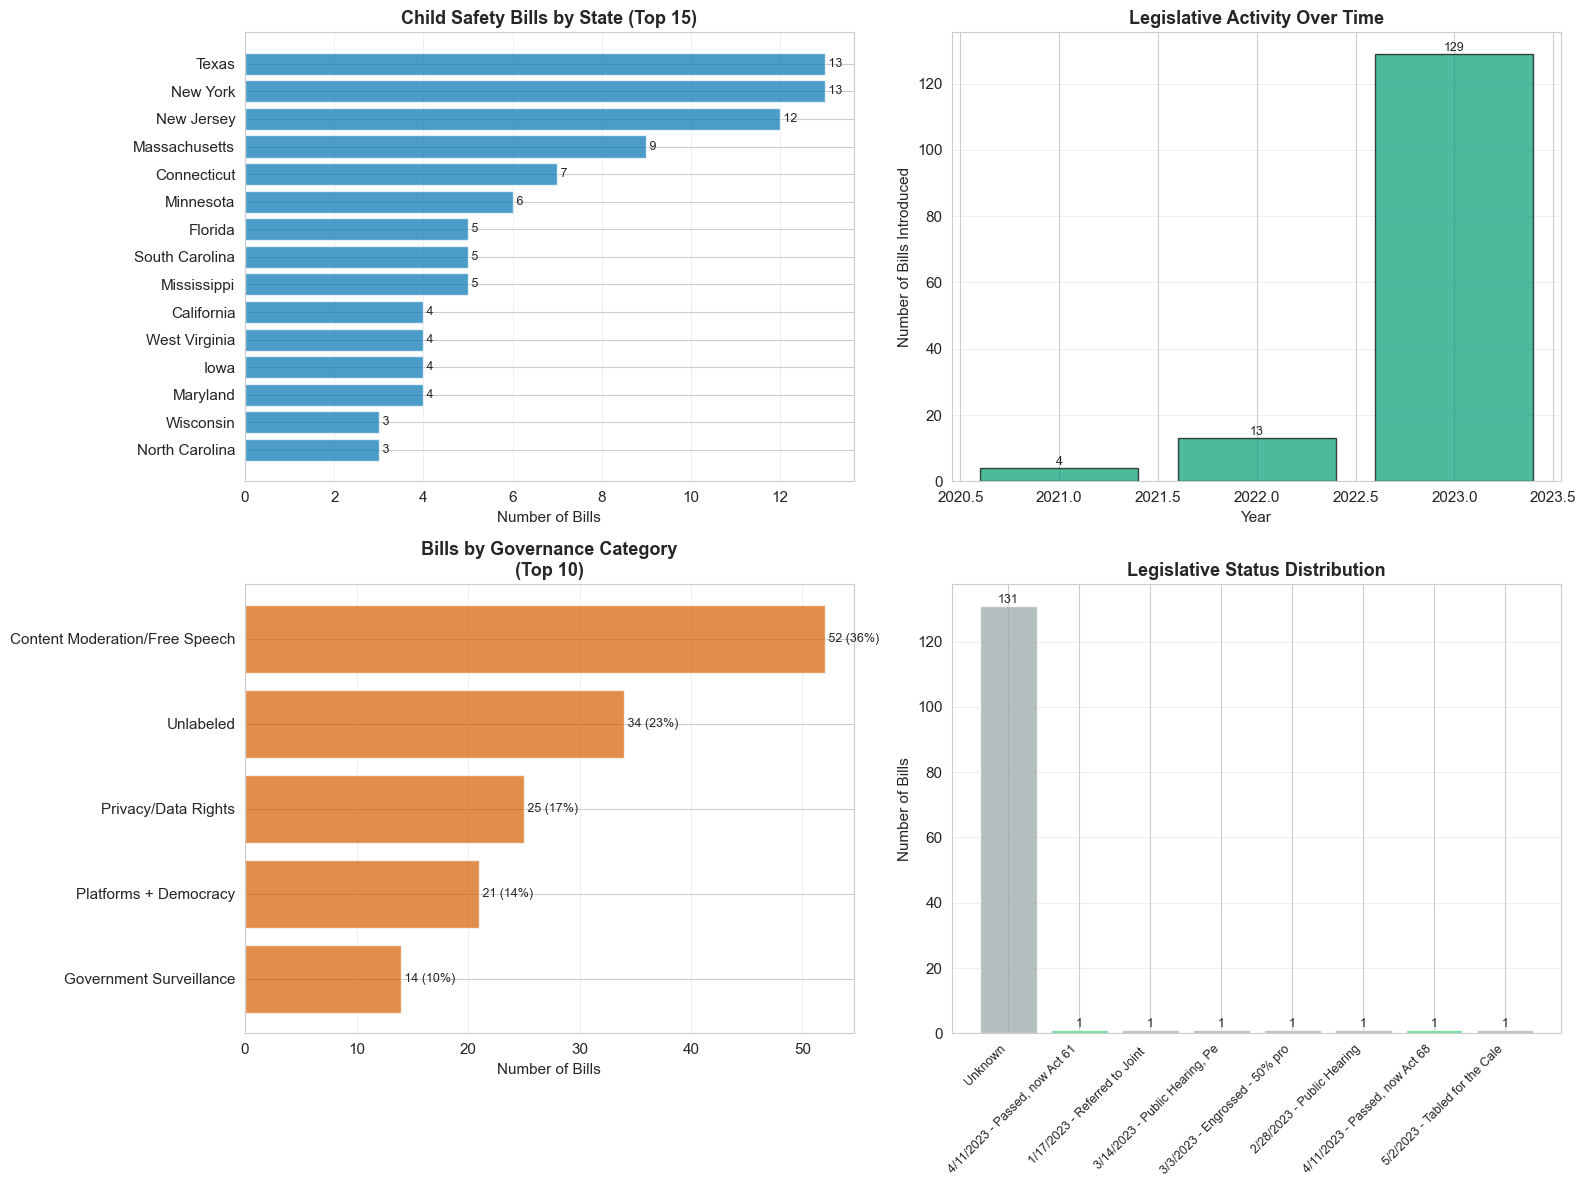

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Bills by State (Top 15)
ax1 = axes[0, 0]
top_15_states = bills_by_state.head(15)
states_list = top_15_states['US State'].to_list()
counts_list = top_15_states['num_bills'].to_list()

ax1.barh(
    range(len(states_list)), 
    counts_list[::-1],
    color='#0072B2',
    alpha=0.7
)
ax1.set_yticks(range(len(states_list)))
ax1.set_yticklabels(states_list[::-1])
ax1.set_xlabel('Number of Bills', fontsize=11)
ax1.set_title('Child Safety Bills by State (Top 15)', fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, count in enumerate(counts_list[::-1]):
    ax1.text(count, i, f' {count}', va='center', fontsize=9)

# Plot 2: Bills by Year
ax2 = axes[0, 1]
years = bills_by_year['Intro_Year'].to_list()
counts = bills_by_year['num_bills'].to_list()
ax2.bar(years, counts, color='#009E73', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Year', fontsize=11)
ax2.set_ylabel('Number of Bills Introduced', fontsize=11)
ax2.set_title('Legislative Activity Over Time', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for year, count in zip(years, counts):
    ax2.text(year, count, f'{count}', ha='center', va='bottom', fontsize=9)

# Plot 3: Governance Categories
ax3 = axes[1, 0]
gov_data = governance_counts.head(10)  # Top 10 governance categories
gov_categories = [str(g)[:30] if g else 'Unlabeled' for g in gov_data['Governance'].to_list()]
gov_counts = gov_data['num_bills'].to_list()

ax3.barh(range(len(gov_categories)), gov_counts[::-1], color='#D55E00', alpha=0.7)
ax3.set_yticks(range(len(gov_categories)))
ax3.set_yticklabels(gov_categories[::-1])
ax3.set_xlabel('Number of Bills', fontsize=11)
ax3.set_title('Bills by Governance Category\n(Top 10)', fontsize=13, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# Add count labels with percentages
for i, count in enumerate(gov_counts[::-1]):
    pct = count / len(df_child) * 100
    ax3.text(count, i, f' {count} ({pct:.0f}%)', va='center', fontsize=9)

# Plot 4: Bill Status Distribution
ax4 = axes[1, 1]
# Get top 8 status categories
top_status = status_counts.head(8)
status_labels = [str(s)[:30] if s else 'Unknown' for s in top_status['Status (optional)'].to_list()]
status_values = top_status['num_bills'].to_list()

colors_status = ['#2ecc71' if s and ('pass' in str(s).lower() or 'act' in str(s).lower())
                 else '#95a5a6' 
                 for s in top_status['Status (optional)'].to_list()]

ax4.bar(range(len(status_labels)), status_values, color=colors_status, alpha=0.7)
ax4.set_xticks(range(len(status_labels)))
ax4.set_xticklabels(status_labels, rotation=45, ha='right', fontsize=9)
ax4.set_ylabel('Number of Bills', fontsize=11)
ax4.set_title('Legislative Status Distribution', fontsize=13, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Add value labels
for i, count in enumerate(status_values):
    ax4.text(i, count, f'{count}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('../output/figures/policy_tracker_exploration.png', dpi=300, bbox_inches='tight')
print("✓ Saved: ../output/figures/policy_tracker_exploration.png")
plt.show()

In [20]:
print(f"""
DATASET OVERVIEW:
- Total child safety bills: {len(df_child)}
- States with legislation: {df_child.select('US State').n_unique()}
- Time range: {df_child['Intro_Year'].min()} - {df_child['Intro_Year'].max()}
- Passed bills identified: {len(passed_bills)}

GEOGRAPHIC CONCENTRATION:
- Top state: {bills_by_state['US State'][0]} ({bills_by_state['num_bills'][0]} bills)
- Median bills per state: {bills_by_state['num_bills'].median()}

TEMPORAL PATTERNS:
- Peak activity year: {bills_by_year.sort('num_bills', descending=True)['Intro_Year'][0]}
- Recent surge: {bills_by_year.filter(pl.col('Intro_Year') >= 2022)['num_bills'].sum()} bills since 2022

GOVERNANCE CATEGORIES:
""")

top_5_gov = governance_counts.head(5)
for row in top_5_gov.iter_rows(named=True):
    category = row['Governance'] if row['Governance'] else 'Unlabeled'
    count = row['num_bills']
    pct = count / len(df_child) * 100
    print(f"  {str(category):35} {count:3} bills ({pct:4.1f}%)")


DATASET OVERVIEW:
- Total child safety bills: 146
- States with legislation: 43
- Time range: 2021 - 2023
- Passed bills identified: 4

GEOGRAPHIC CONCENTRATION:
- Top state: Texas (13 bills)
- Median bills per state: 2.0

TEMPORAL PATTERNS:
- Peak activity year: 2023
- Recent surge: 142 bills since 2022

GOVERNANCE CATEGORIES:

  Content Moderation/Free Speech       52 bills (35.6%)
  Unlabeled                            34 bills (23.3%)
  Privacy/Data Rights                  25 bills (17.1%)
  Platforms + Democracy                21 bills (14.4%)
  Government Surveillance              14 bills ( 9.6%)
